<a href="https://colab.research.google.com/github/Nkn2001/Restaurant-tips-Analysys/blob/main/Restaurant_tips_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🍽️ Restaurant Tips Analysis**

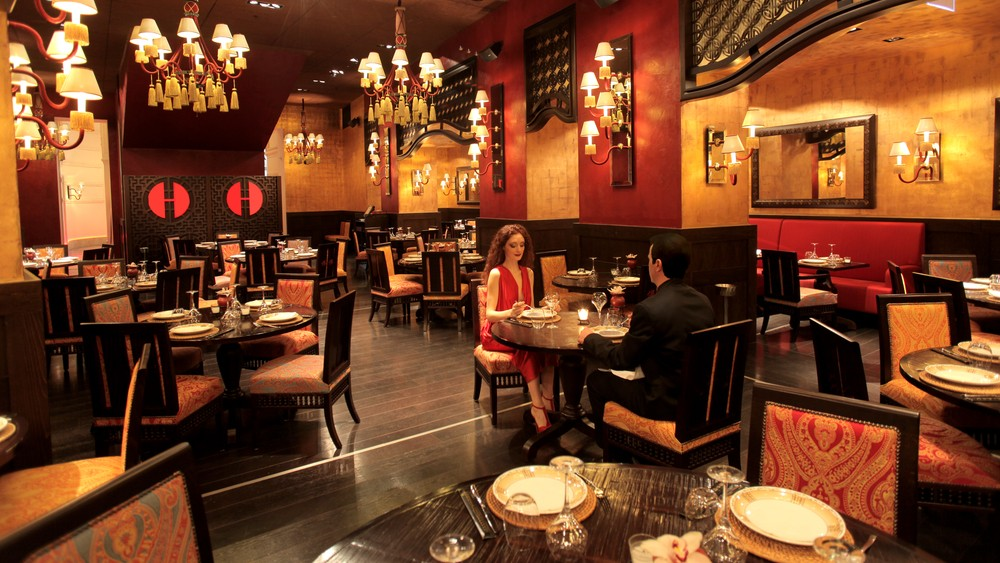

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [ ]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt


Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [ ]:
# PUT YOUR CODE HERE
df = pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')


### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [ ]:
# PUT YOUR CODE HERE
df.head()

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [ ]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

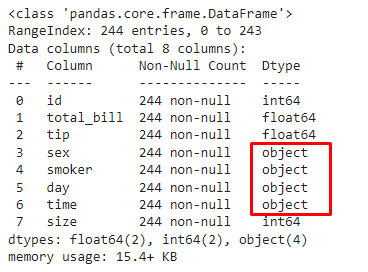

Let's fix their types and make them string:

In [ ]:
# PUT YOUR CODE HERE
df1 = df.convert_dtypes()


Check again (output columns and their types):

In [ ]:
# PUT YOUR CODE HERE
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [ ]:
# PUT YOUR CODE HERE
df1.describe()


,id,total_bill,tip,size
count,244.0,244.0,244.0,244.0
mean,121.5,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.9511
min,0.0,3.07,1.0,1.0
25%,60.75,13.3475,2.0,2.0
50%,121.5,17.795,2.9,2.0
75%,182.25,24.1275,3.5625,3.0
max,243.0,50.81,10.0,6.0


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [ ]:
# PUT YOUR CODE HERE
smokers_df = df1.query('smoker == "Yes"')

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# PUT YOUR CODE HERE
smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
192,192,28.44,2.56,Male,Yes,Thur,Lunch,2
220,220,12.16,2.2,Male,Yes,Fri,Lunch,2
206,206,26.59,3.41,Male,Yes,Sat,Dinner,3
203,203,16.4,2.5,Female,Yes,Thur,Lunch,2
100,100,11.35,2.5,Female,Yes,Fri,Dinner,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [ ]:
# PUT YOUR CODE HERE
non_smokers_df = df1.query('smoker == "No"')

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# PUT YOUR CODE HERE
non_smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
147,147,11.87,1.63,Female,No,Thur,Lunch,2
2,2,21.01,3.5,Male,No,Sun,Dinner,3
143,143,27.05,5.0,Female,No,Thur,Lunch,6
142,142,41.19,5.0,Male,No,Thur,Lunch,5
59,59,48.27,6.73,Male,No,Sat,Dinner,4


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [ ]:
# YOUR CODE
common_tip_min = df1.tip.min()
common_tip_max = df1.tip.max()
common_tip_mean = df1.tip.mean()
common_tip_median = df1.tip.median()

Let's show the resulting values for


whole dataset (we already have the code


written for you 😉)



In [ ]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [ ]:
# YOUR CODE
smokers_tip_min = smokers_df.tip.min()
smokers_tip_max = smokers_df.tip.max()
smokers_tip_mean = smokers_df.tip.mean()
smokers_tip_median = smokers_df.tip.median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
# Make a list of values
smokers_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
# Round all the values to 4 decimal places
smokers_values = map(lambda x: round(x, 4), smokers_values)

# Make a dataframe from the list
smokers_mct = pd.DataFrame(smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
smokers_mct

,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [ ]:
# YOUR CODE
non_smokers_tip_min = non_smokers_df.tip.min()
non_smokers_tip_max = non_smokers_df.tip.max()
non_smokers_tip_mean = non_smokers_df.tip.mean()
non_smokers_tip_median = non_smokers_df.tip.median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
# Make a list of values
non_smokers_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]
# Round all the values to 4 decimal places
non_smokers_values = map(lambda x: round(x, 4), non_smokers_values)

# Make a dataframe from the list
non_smokers_mct = pd.DataFrame(non_smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
non_smokers_mct

,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

1. Insight 1
2. Insight 1

**General conclusion:**


#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

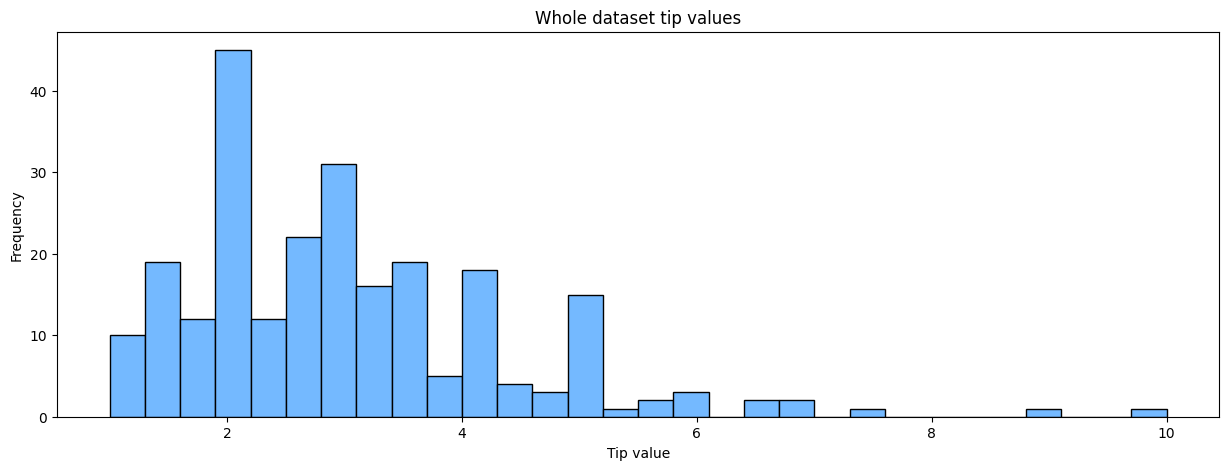

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df1['tip'], bins=30, color='#74b9ff', edgecolor='black')

# Customizing the plot
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')


# Show the plot
plt.show()

##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

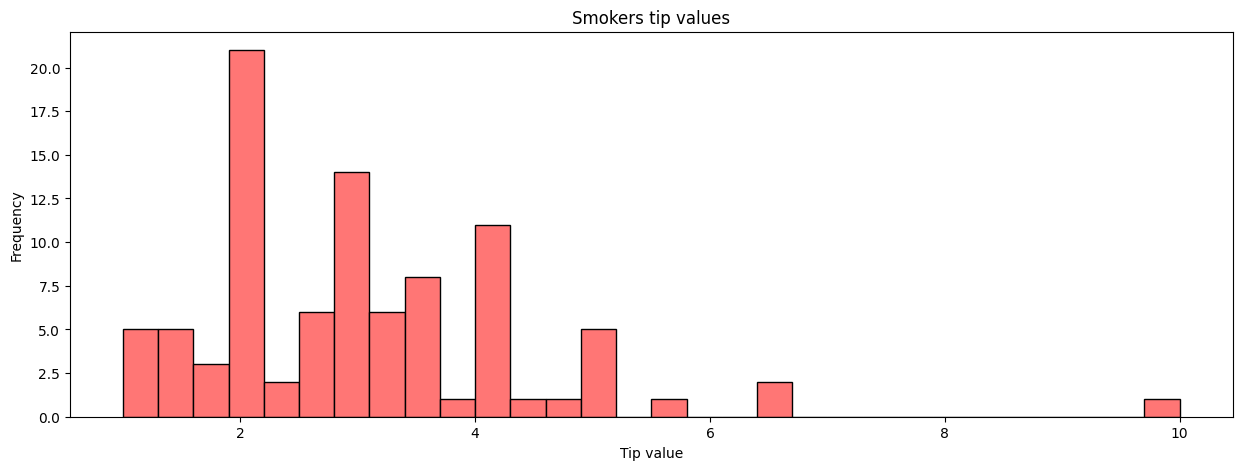

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(smokers_df['tip'], bins=30, color='#ff7675', edgecolor='black')

# Customizing the plot
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')


# Show the plot
plt.show()

##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

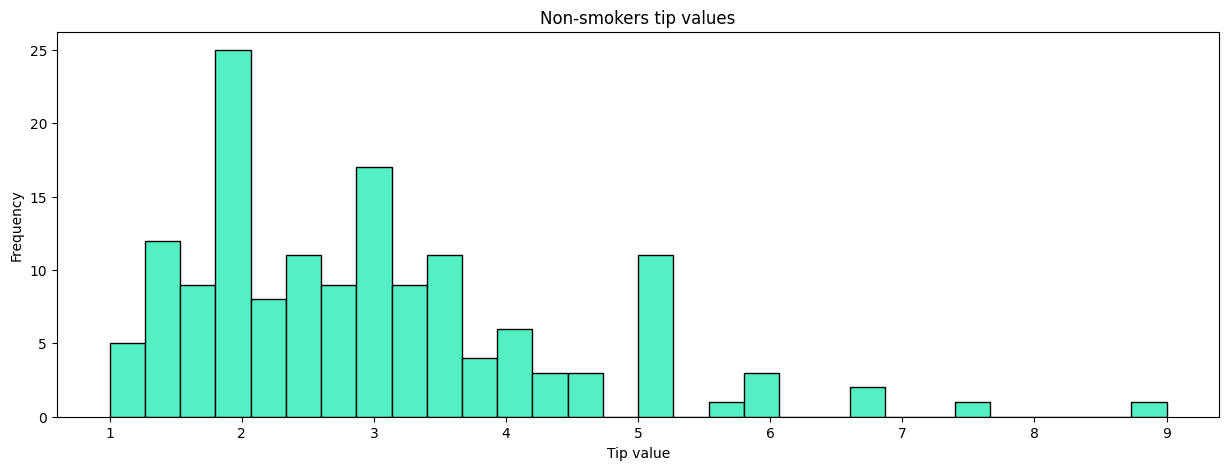

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(non_smokers_df['tip'], bins=30, color='#55efc4', edgecolor='black')

# Customizing the plot
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')


# Show the plot
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

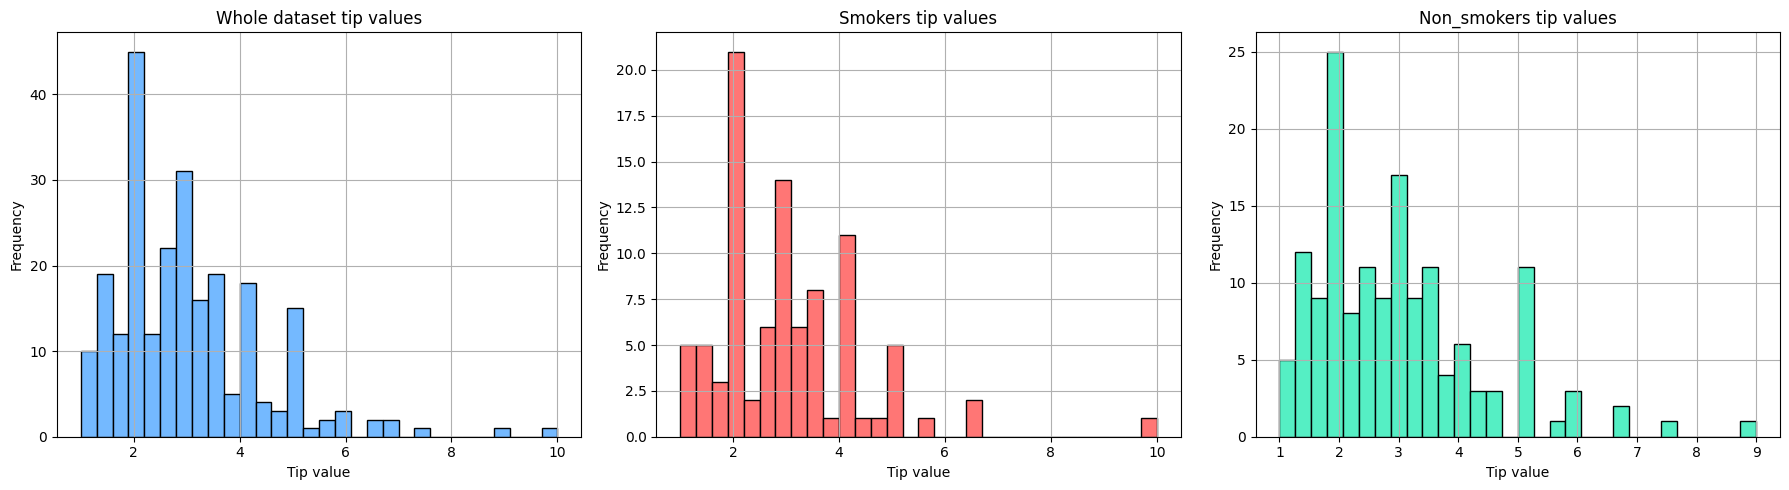

In [ ]:
# YOUR CODE
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(df['tip'], bins=30, color='#74b9ff', edgecolor='black')
axes[0].set_title('Whole dataset tip values')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)


axes[1].hist(smokers_df['tip'], bins=30, color='#ff7675', edgecolor='black')
axes[1].set_title('Smokers tip values')
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)


axes[2].hist(non_smokers_df['tip'], bins=30, color='#55efc4', edgecolor='black')
axes[2].set_title('Non_smokers tip values')
axes[2].set_xlabel('Tip value')
axes[2].set_ylabel('Frequency')
axes[2].grid(True)


plt.tight_layout()
plt.show()

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. Insight 1

**General conclusion:**

### **👨👩 Do males give more tips?**

Perform the same steps based on the column **sex**.

#### **Separate male and female**

Create a new dataframe `male_df` containing only info about male.






In [ ]:
# YOUR CODE
male_df = df1.query('sex == "Male"')

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# Your code
male_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
129,129,22.82,2.18,Male,No,Thur,Lunch,3
180,180,34.65,3.68,Male,Yes,Sun,Dinner,4
192,192,28.44,2.56,Male,Yes,Thur,Lunch,2
176,176,17.89,2.0,Male,Yes,Sun,Dinner,2
165,165,24.52,3.48,Male,No,Sun,Dinner,3


Also create another one dataframe `female_df` containing only female.

In [ ]:
# YOUR CODE
female_df = df1.query('sex == "Female"')

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
female_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
240,240,27.18,2.0,Female,Yes,Sat,Dinner,2
104,104,20.92,4.08,Female,No,Sat,Dinner,2
127,127,14.52,2.0,Female,No,Thur,Lunch,2
67,67,3.07,1.0,Female,Yes,Sat,Dinner,1
191,191,19.81,4.19,Female,Yes,Thur,Lunch,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [ ]:
# YOUR CODE
common_tip_min = df1.tip.min()
common_tip_max = df1.tip.max()
common_tip_mean = df1.tip.mean()
common_tip_median = df1.tip.median()

Let's show the resulting values for


whole dataset (we already have the code


written for you 😉)

In [ ]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **👨 Male**

Do the same taking into account only Male. Use the following variables:

* min => `male_tip_min`
* max => `male_tip_max`
* mean => `male_tip_mean`
* median => `male_tip_median`

In [ ]:
male_tip_min = male_df.tip.min()
male_tip_max = male_df.tip.max()
male_tip_mean = male_df.tip.mean()
male_tip_median = male_df.tip.median()

Let's show the resulting values for

whole dataset (we already have the code

written for you 😉)

In [ ]:
# Make a list of values
male_values = [male_tip_min, male_tip_max, male_tip_mean, male_tip_median]
# Round all the values to 4 decimal places
male_values = map(lambda x: round(x, 4), male_values)

# Make a dataframe from the list
male_mct = pd.DataFrame(male_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
male_mct

,0
min,1.0000
max,10.0000
mean,3.0896
median,3.0000


##### **👩 Female**

Do the same taking into account only female. Use the following variables:

* min => `female_tip_min`
* max => `female_tip_max`
* mean => `female_tip_mean`
* median => `female_tip_median`

In [ ]:
female_tip_min = female_df.tip.min()
female_tip_max = female_df.tip.max()
female_tip_mean = female_df.tip.mean()
female_tip_median = female_df.tip.median()

Let's show the resulting values for

whole dataset (we already have the code

written for you 😉)

In [ ]:
# Make a list of values
female_values = [female_tip_min, female_tip_max, female_tip_mean, female_tip_median]
# Round all the values to 4 decimal places
female_values = map(lambda x: round(x, 4), female_values)

# Make a dataframe from the list
female_mct = pd.DataFrame(female_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
female_mct

,0
min,1.0000
max,6.5000
mean,2.8334
median,2.7500


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Male': {'min': male_tip_min, 'max': male_tip_max, 'mean': male_tip_mean, 'median': male_tip_median},
    'Female': {'min': female_tip_min, 'max': female_tip_max, 'mean': female_tip_mean, 'median': female_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Male,Female
min,1.000000,1.000000,1.000000
max,10.000000,10.000000,6.500000
mean,2.998279,3.089618,2.833448
median,2.900000,3.000000,2.750000


#### **Look at histograms**

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

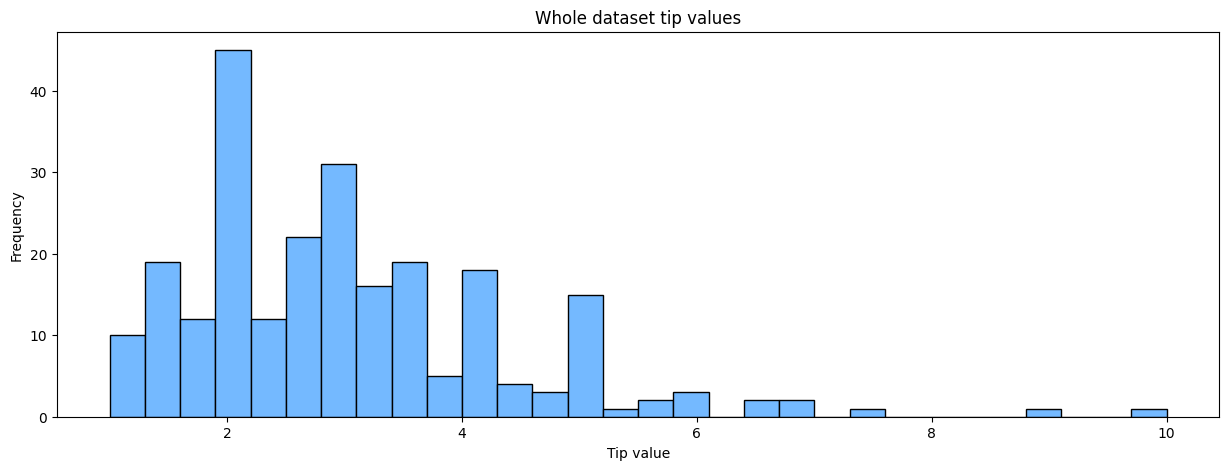

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df1['tip'], bins=30, color='#74b9ff', edgecolor='black')

# Customizing the plot
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')


# Show the plot
plt.show()

##### **👨male tips histogram**

Plot the histogram for male tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Male tip values`
* Gridlines: `show`

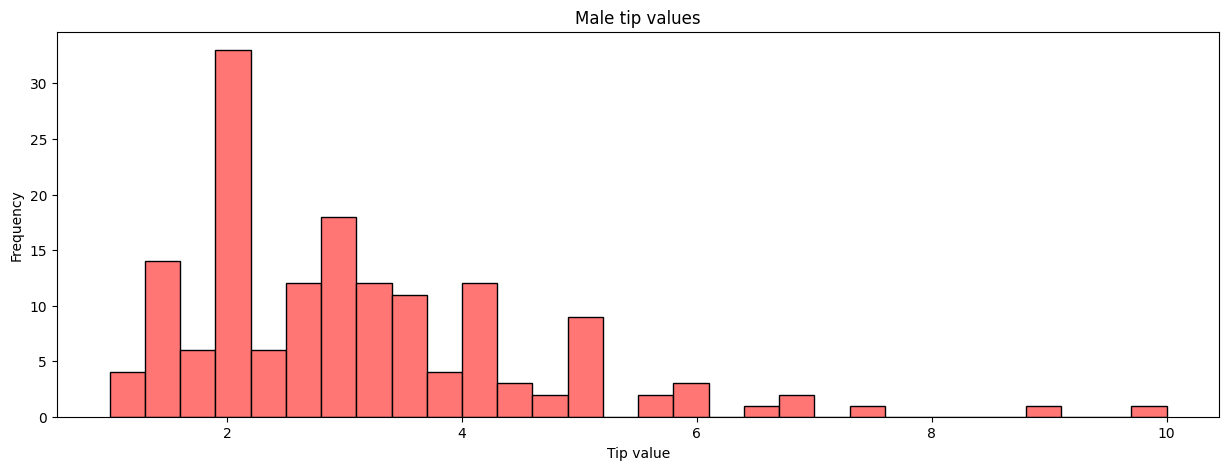

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(male_df['tip'], bins=30, color='#ff7675', edgecolor='black')

# Customizing the plot
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Male tip values')


# Show the plot
plt.show()

##### **👩fe male tips histogram**

Plot the histogram for female tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Female tip values`
* Gridlines: `show`

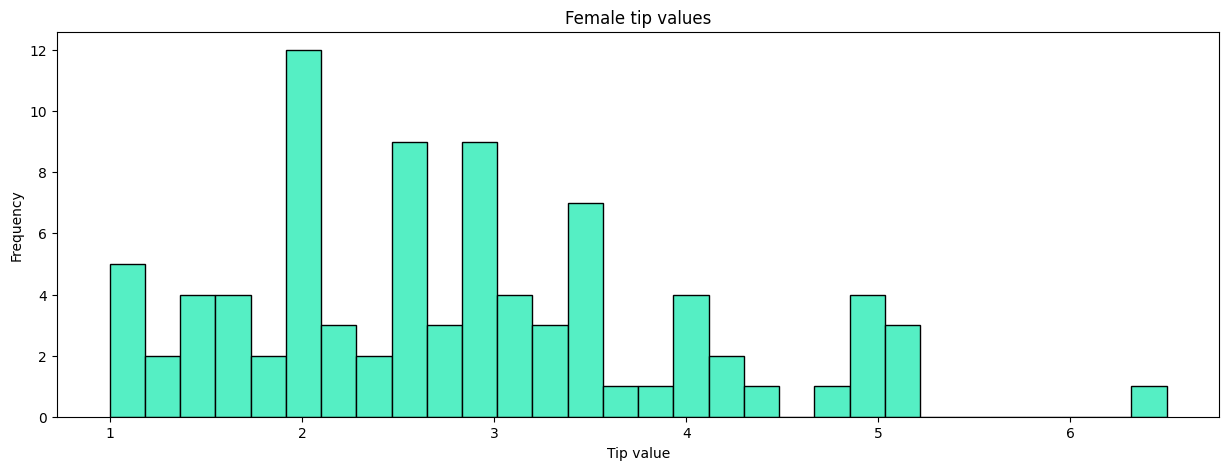

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(female_df['tip'], bins=30, color='#55efc4', edgecolor='black')

# Customizing the plot
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Female tip values')


# Show the plot
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:





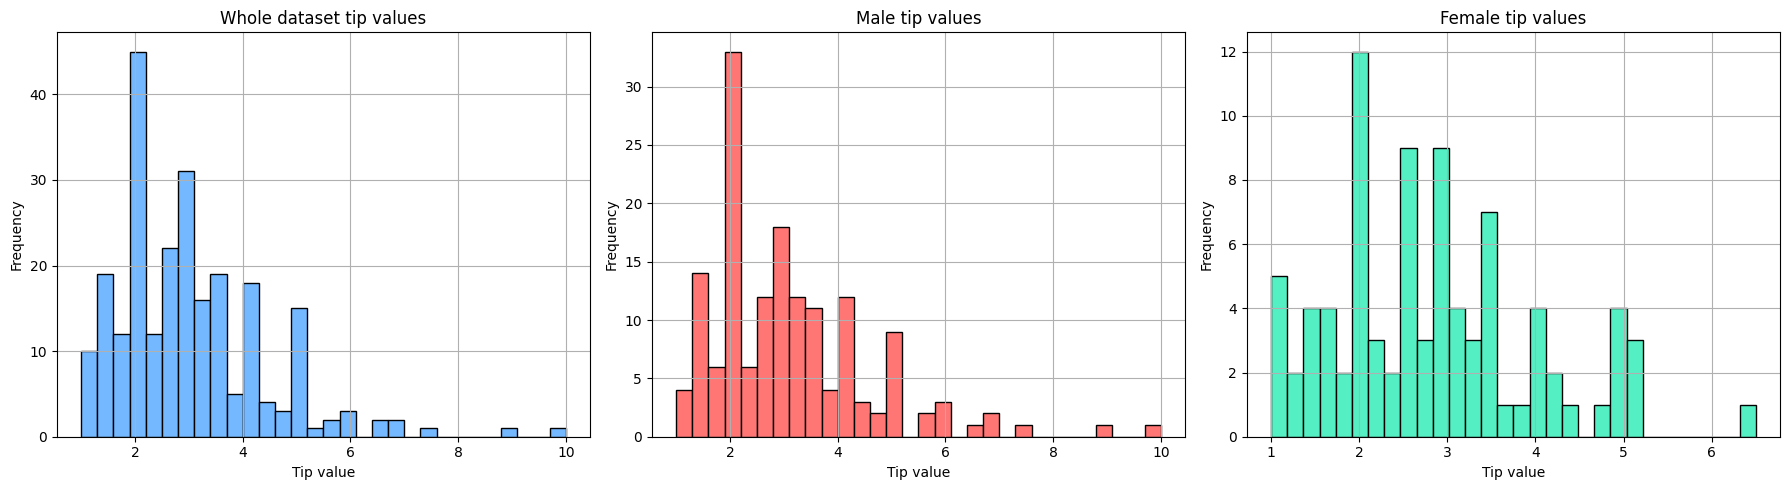

In [ ]:
# YOUR CODE
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(df1['tip'], bins=30, color='#74b9ff', edgecolor='black')
axes[0].set_title('Whole dataset tip values')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)


axes[1].hist(male_df['tip'], bins=30, color='#ff7675', edgecolor='black')
axes[1].set_title('Male tip values')
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)


axes[2].hist(female_df['tip'], bins=30, color='#55efc4', edgecolor='black')
axes[2].set_title('Female tip values')
axes[2].set_xlabel('Tip value')
axes[2].set_ylabel('Frequency')
axes[2].grid(True)


plt.tight_layout()
plt.show()

### **📆 Do weekends bring more tips?**

Perform the same steps based on the column **day**.

#### **Separate the day of week**

Create a list of the days in the `day` column of the data.



In [ ]:
unique_day = df['day'].unique()
print(unique_day)

['Sun' 'Sat' 'Thur' 'Fri']


Create a new dataframe `thur_df` containing only info about Thursday.


In [ ]:
thur_df = df1.query('day =="Thur"')

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
thur_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
203,203,16.4,2.5,Female,Yes,Thur,Lunch,2
205,205,16.47,3.23,Female,Yes,Thur,Lunch,3
135,135,8.51,1.25,Female,No,Thur,Lunch,2
142,142,41.19,5.0,Male,No,Thur,Lunch,5
80,80,19.44,3.0,Male,Yes,Thur,Lunch,2


Create a new dataframe `fri_df` containing only info about Friday.


In [ ]:
fri_df = df1.query('day =="Fri"')

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
fri_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
98,98,21.01,3.0,Male,Yes,Fri,Dinner,2
92,92,5.75,1.0,Female,Yes,Fri,Dinner,2
91,91,22.49,3.5,Male,No,Fri,Dinner,2
95,95,40.17,4.73,Male,Yes,Fri,Dinner,4
94,94,22.75,3.25,Female,No,Fri,Dinner,2


Create a new dataframe `sat_df` containing only info about Saturday.


In [ ]:
sat_df = df1.query('day =="Sat"')

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
sat_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
111,111,7.25,1.0,Female,No,Sat,Dinner,1
110,110,14.0,3.0,Male,No,Sat,Dinner,2
228,228,13.28,2.72,Male,No,Sat,Dinner,2
230,230,24.01,2.0,Male,Yes,Sat,Dinner,4
212,212,48.33,9.0,Male,No,Sat,Dinner,4


Create a new dataframe `sun_df` containing only info about Sunday.


In [ ]:
sun_df = df1.query('day =="Sun" ')

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
sun_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
41,41,17.46,2.54,Male,No,Sun,Dinner,2
18,18,16.97,3.5,Female,No,Sun,Dinner,3
1,1,10.34,1.66,Male,No,Sun,Dinner,3
185,185,20.69,5.0,Male,No,Sun,Dinner,5
187,187,30.46,2.0,Male,Yes,Sun,Dinner,5


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [ ]:
# YOUR CODE
common_tip_min = df1.tip.min()
common_tip_max = df1.tip.max()
common_tip_mean = df1.tip.mean()
common_tip_median = df1.tip.median()

Let's show the resulting values for


whole dataset (we already have the code


written for you 😉)

In [ ]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **Thursday**

Do the same taking into account only thursday. Use the following variables:

* min => `thur_tip_min`
* max => `thur_tip_max`
* mean => `thur_tip_mean`
* median => `thur_tip_median`

In [ ]:
# YOUR CODE
thur_tip_min = thur_df.tip.min()
thur_tip_max = thur_df.tip.max()
thur_tip_mean = thur_df.tip.mean()
thur_tip_median = thur_df.tip.median()

Let's show the resulting values for

whole dataset (we already have the code

written for you 😉)

In [ ]:
# Make a list of values
thur_values = [thur_tip_min, thur_tip_max, thur_tip_mean, thur_tip_median]
# Round all the values to 4 decimal places
thur_values = map(lambda x: round(x, 4), thur_values)

# Make a dataframe from the list
thur_mct = pd.DataFrame(thur_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
thur_mct

,0
min,1.2500
max,6.7000
mean,2.7715
median,2.3050


#####**Friday**

Do the same taking into account only friday. Use the following variables:

* min => `fri_tip_min`
* max => `fri_tip_max`
* mean => `fri_tip_mean`
* median => `fri_tip_median`

In [ ]:
# YOUR CODE
fri_tip_min = fri_df.tip.min()
fri_tip_max = fri_df.tip.max()
fri_tip_mean = fri_df.tip.mean()
fri_tip_median = fri_df.tip.median()

Let's show the resulting values for

whole dataset (we already have the code

written for you 😉)

In [ ]:
# Make a list of values
fri_values = [fri_tip_min, fri_tip_max, fri_tip_mean, fri_tip_median]
# Round all the values to 4 decimal places
fri_values = map(lambda x: round(x, 4), fri_values)

# Make a dataframe from the list
fri_mct = pd.DataFrame(fri_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
fri_mct

,0
min,1.0000
max,4.7300
mean,2.7347
median,3.0000


#####**Saturday**

Do the same taking into account only saturday. Use the following variables:

* min => `sat_tip_min`
* max => `sat_tip_max`
* mean => `sat_tip_mean`
* median => `sat_tip_median`

In [ ]:
from os import stat
# YOUR CODE
sat_tip_min = sat_df.tip.min()
sat_tip_max = sat_df.tip.max()
sat_tip_mean = sat_df.tip.mean()
sat_tip_median = sat_df.tip.median()

Let's show the resulting values for

whole dataset (we already have the code

written for you 😉)

In [ ]:
# Make a list of values
sat_values = [sat_tip_min, sat_tip_max, sat_tip_mean, sat_tip_median]
# Round all the values to 4 decimal places
sat_values = map(lambda x: round(x, 4), sat_values)

# Make a dataframe from the list
sat_mct = pd.DataFrame(sat_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
sat_mct

,0
min,1.0000
max,10.0000
mean,2.9931
median,2.7500


#####**Sunday**

Do the same taking into account only sunday. Use the following variables:

* min => `sun_tip_min`
* max => `sun_tip_max`
* mean => `sun_tip_mean`
* median => `sun_tip_median`

In [ ]:
from os import stat
# YOUR CODE
sun_tip_min = sun_df.tip.min()
sun_tip_max = sun_df.tip.max()
sun_tip_mean = sun_df.tip.mean()
sun_tip_median = sun_df.tip.median()

Let's show the resulting values for

whole dataset (we already have the code

written for you 😉)

In [ ]:
# Make a list of values
sun_values = [sun_tip_min, sun_tip_max, sun_tip_mean, sun_tip_median]
# Round all the values to 4 decimal places
sun_values = map(lambda x: round(x, 4), sun_values)

# Make a dataframe from the list
sun_mct = pd.DataFrame(sun_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
sun_mct

,0
min,1.0100
max,6.5000
mean,3.2551
median,3.1500


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Thur': {'min': thur_tip_min, 'max': thur_tip_max, 'mean': thur_tip_mean, 'median': thur_tip_median},
    'Fri': {'min': fri_tip_min, 'max': fri_tip_max, 'mean': fri_tip_mean, 'median': fri_tip_median},
    'Sat': {'min': sat_tip_min, 'max': sat_tip_max, 'mean': sat_tip_mean, 'median': sat_tip_median},
    'Sun': {'min': sun_tip_min, 'max': sun_tip_max, 'mean': sun_tip_mean, 'median': sun_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Thur,Fri,Sat,Sun
min,1.000000,1.250000,1.000000,1.000000,1.010000
max,10.000000,6.700000,4.730000,10.000000,6.500000
mean,2.998279,2.771452,2.734737,2.993103,3.255132
median,2.900000,2.305000,3.000000,2.750000,3.150000


#### **Look at histograms**

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

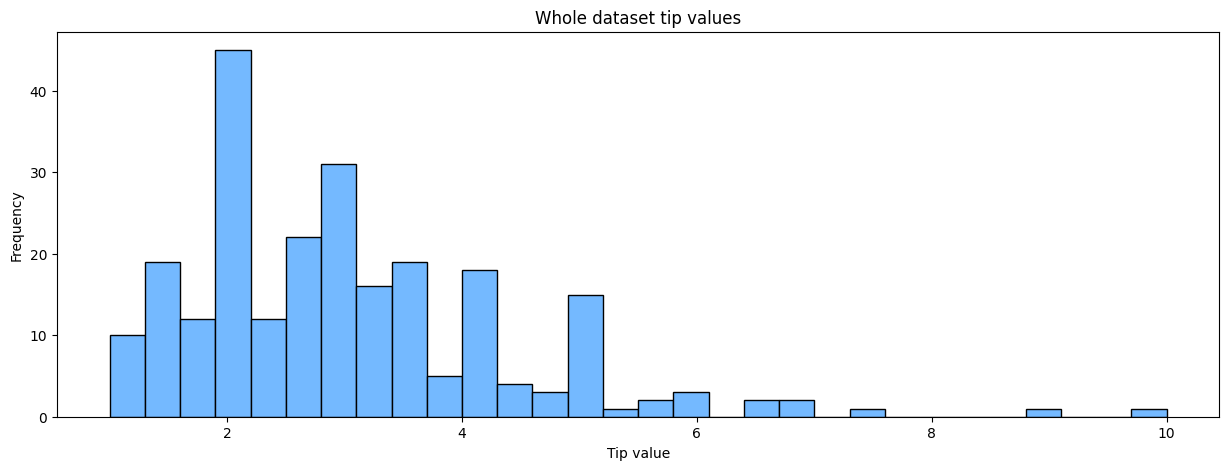

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df1['tip'], bins=30, color='#74b9ff', edgecolor='black')

# Customizing the plot
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')


# Show the plot
plt.show()

#####**Thursday tips histogram**

Plot the histogram for Thursday tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Thursday tip values`
* Gridlines: `show`

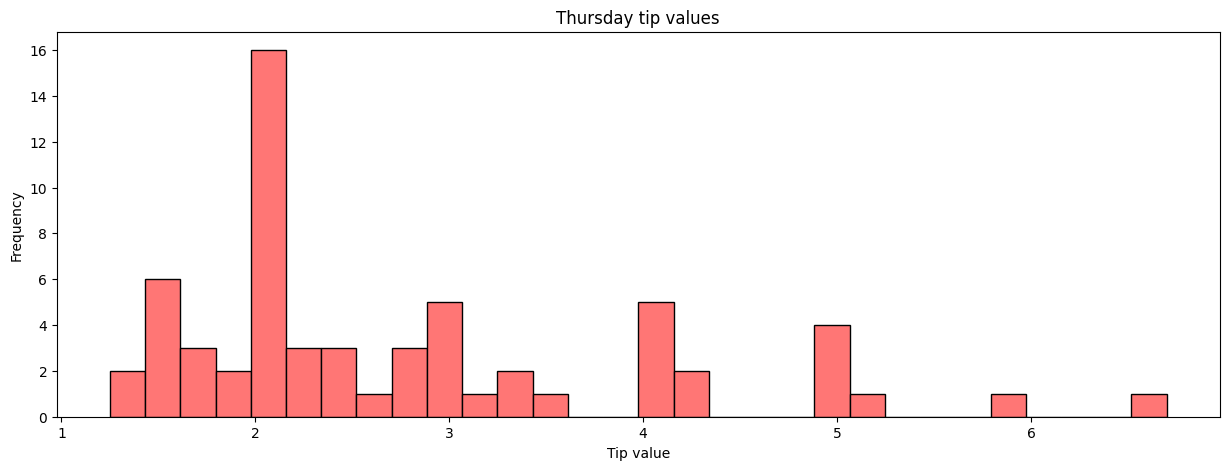

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(thur_df['tip'], bins=30, color='#ff7675', edgecolor='black')

# Customizing the plot
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Thursday tip values')


# Show the plot
plt.show()

#####**Friday tips histogram**

Plot the histogram for friday tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Friday tip values`
* Gridlines: `show`

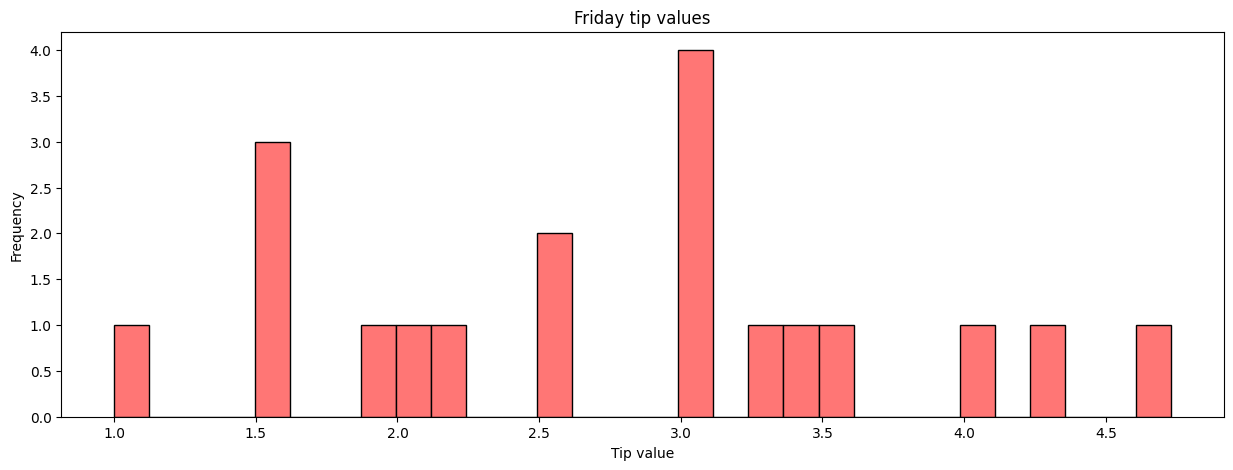

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(fri_df['tip'], bins=30, color='#ff7675', edgecolor='black')

# Customizing the plot
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Friday tip values')


# Show the plot
plt.show()

#####**Saturday tips histogram**

Plot the histogram for saturday tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Saturday tip values`
* Gridlines: `show`

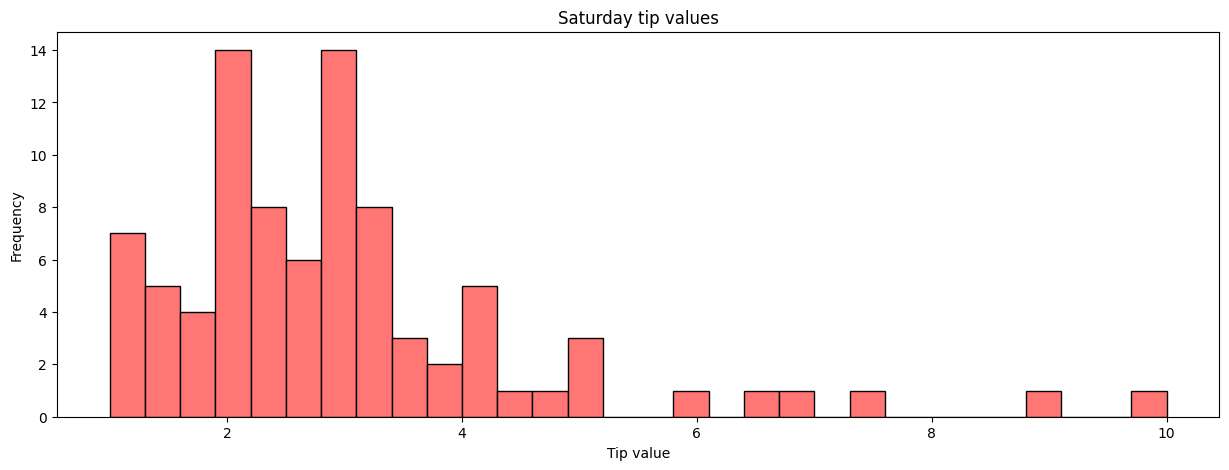

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(sat_df['tip'], bins=30, color='#ff7675', edgecolor='black')

# Customizing the plot
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Saturday tip values')


# Show the plot
plt.show()

#####**Sunday tips histogram**

Plot the histogram for sunday tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Sunday tip values`
* Gridlines: `show`



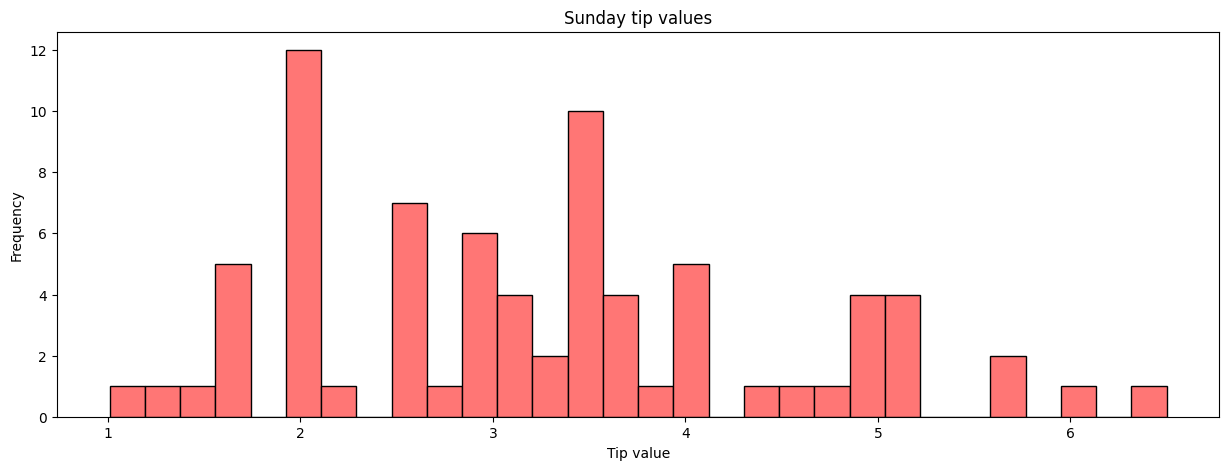

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(sun_df['tip'], bins=30, color='#ff7675', edgecolor='black')

# Customizing the plot
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Sunday tip values')


# Show the plot
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 5 charts in a row in the same cell:





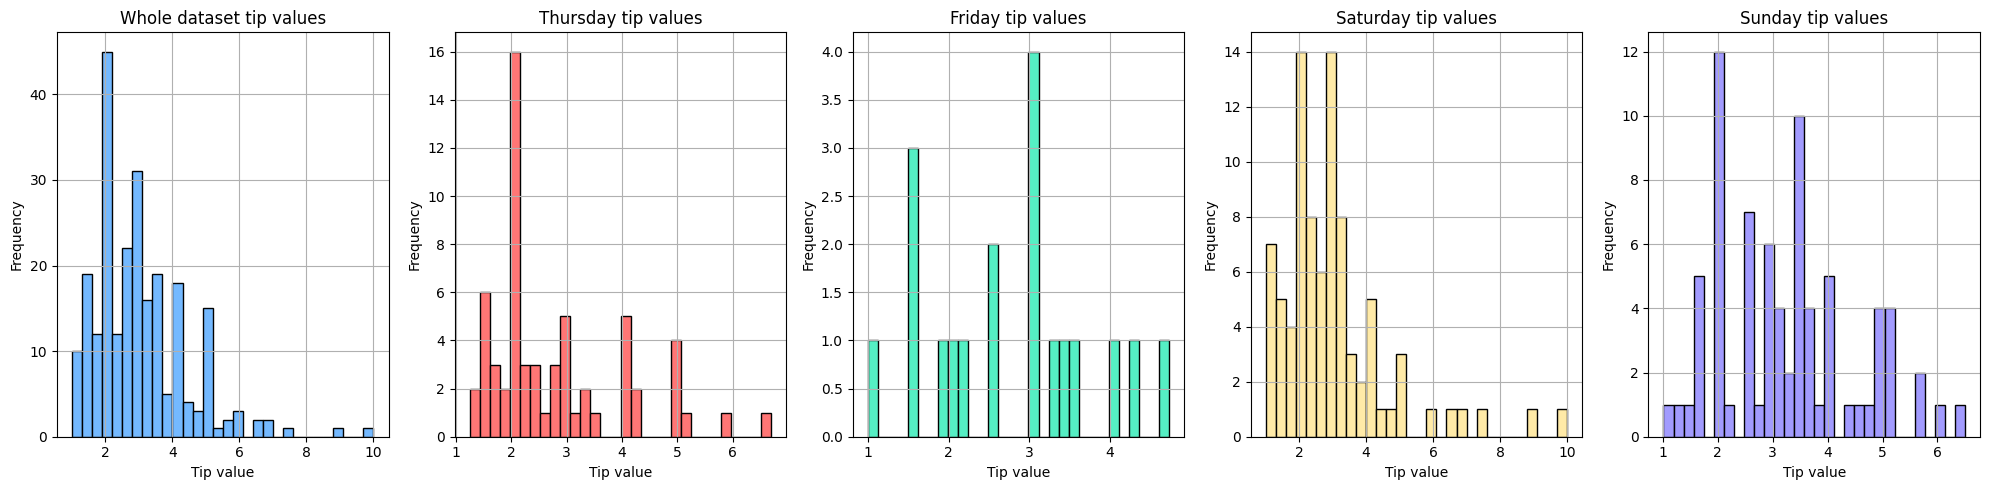

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Whole dataset
axes[0].hist(df1['tip'], bins=30, color='#74b9ff', edgecolor='black')
axes[0].set_title('Whole dataset tip values')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Thursday
axes[1].hist(thur_df['tip'], bins=30, color='#ff7675', edgecolor='black')
axes[1].set_title('Thursday tip values')
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# Friday
axes[2].hist(fri_df['tip'], bins=30, color='#55efc4', edgecolor='black')
axes[2].set_title('Friday tip values')
axes[2].set_xlabel('Tip value')
axes[2].set_ylabel('Frequency')
axes[2].grid(True)

# Saturday
axes[3].hist(sat_df['tip'], bins=30, color='#ffeaa7', edgecolor='black')
axes[3].set_title('Saturday tip values')
axes[3].set_xlabel('Tip value')
axes[3].set_ylabel('Frequency')
axes[3].grid(True)

# Sunday
axes[4].hist(sun_df['tip'], bins=30, color='#a29bfe', edgecolor='black')
axes[4].set_title('Sunday tip values')
axes[4].set_xlabel('Tip value')
axes[4].set_ylabel('Frequency')
axes[4].grid(True)

plt.tight_layout()
plt.show()


### **🕑 Do dinners bring more tips?**

#### **Separate the day of week**

Create a new dataframe `dinner_df` containing only info about dinner.






In [ ]:
dinner_df = df1.query('time =="Dinner"')

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
dinner_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
99,99,12.46,1.5,Male,No,Fri,Dinner,2
55,55,19.49,3.51,Male,No,Sun,Dinner,2
112,112,38.07,4.0,Male,No,Sun,Dinner,3
76,76,17.92,3.08,Male,Yes,Sat,Dinner,2
150,150,14.07,2.5,Male,No,Sun,Dinner,2


Create a new dataframe `lunch_df` containing only info about lunch.






In [ ]:
lunch_df = df1.query('time =="Lunch"')

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
lunch_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
223,223,15.98,3.0,Female,No,Fri,Lunch,3
198,198,13.0,2.0,Female,Yes,Thur,Lunch,2
80,80,19.44,3.0,Male,Yes,Thur,Lunch,2
129,129,22.82,2.18,Male,No,Thur,Lunch,3
128,128,11.38,2.0,Female,No,Thur,Lunch,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [ ]:
# YOUR CODE
common_tip_min = df1.tip.min()
common_tip_max = df1.tip.max()
common_tip_mean = df1.tip.mean()
common_tip_median = df1.tip.median()

Let's show the resulting values for


whole dataset (we already have the code


written for you 😉)

In [ ]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **Dinner**

Do the same taking into account only dinner. Use the following variables:

* min => `dinner_tip_min`
* max => `dinner_tip_max`
* mean => `dinner_tip_mean`
* median => `dinner_tip_median`

In [ ]:
# YOUR CODE
dinner_tip_min = dinner_df.tip.min()
dinner_tip_max = dinner_df.tip.max()
dinner_tip_mean = dinner_df.tip.mean()
dinner_tip_median = dinner_df.tip.median()

Let's show the resulting values for


whole dataset (we already have the code


written for you 😉)

In [ ]:
# Make a list of values
dinner_values = [dinner_tip_min, dinner_tip_max, dinner_tip_mean, dinner_tip_median]
# Round all the values to 4 decimal places
dinner_values = map(lambda x: round(x, 4), dinner_values)

# Make a dataframe from the list
dinner_mct = pd.DataFrame(dinner_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
dinner_mct

,0
min,1.0000
max,10.0000
mean,3.1027
median,3.0000


##### **Dinner**

Do the same taking into account only lunch. Use the following variables:
* min => `lunch_tip_min`
* max => `lunch_tip_max`
* mean => `lunch_tip_mean`
* median => `lunch_tip_median`

In [ ]:
# YOUR CODE
lunch_tip_min = lunch_df.tip.min()
lunch_tip_max = lunch_df.tip.max()
lunch_tip_mean = lunch_df.tip.mean()
lunch_tip_median = lunch_df.tip.median()

Let's show the resulting values for


whole dataset (we already have the code


written for you 😉)

In [ ]:
# Make a list of values
lunch_values = [lunch_tip_min, lunch_tip_max, lunch_tip_mean, lunch_tip_median]
# Round all the values to 4 decimal places
lunch_values = map(lambda x: round(x, 4), lunch_values)

# Make a dataframe from the list
lunch_mct = pd.DataFrame(lunch_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
lunch_mct

,0
min,1.2500
max,6.7000
mean,2.7281
median,2.2500


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Dinner': {'min': dinner_tip_min, 'max': dinner_tip_max, 'mean': dinner_tip_mean, 'median': dinner_tip_median},
    'Lunch': {'min': lunch_tip_min, 'max': lunch_tip_max, 'mean': lunch_tip_mean, 'median': lunch_tip_median},
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Dinner,Lunch
min,1.000000,1.00000,1.250000
max,10.000000,10.00000,6.700000
mean,2.998279,3.10267,2.728088
median,2.900000,3.00000,2.250000


#### **Look at histograms**

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

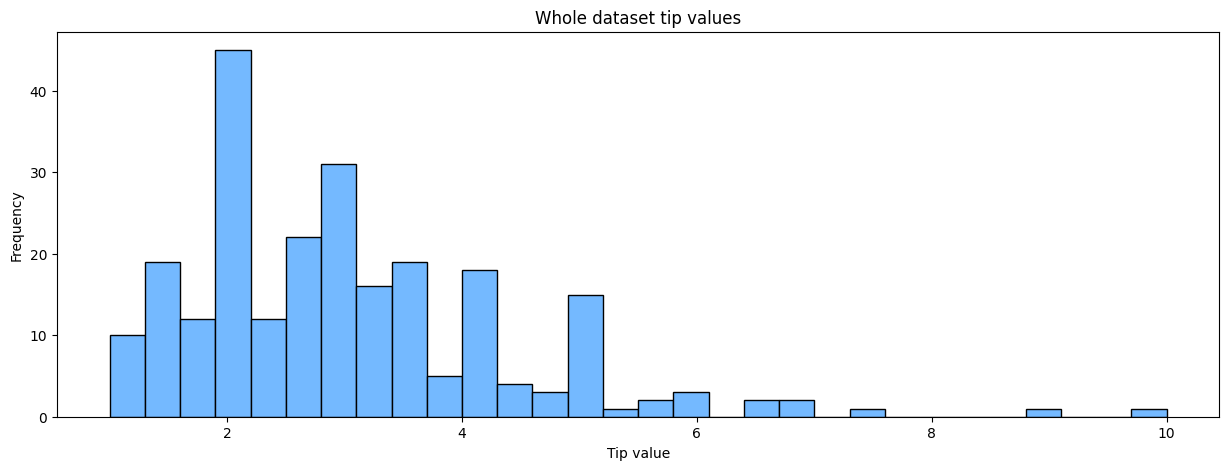

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df1['tip'], bins=30, color='#74b9ff', edgecolor='black')

# Customizing the plot
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')


# Show the plot
plt.show()

#####**Dinner tips histogram**

Plot the histogram for the dinner dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Dinner tip values`
* Gridlines: `show`

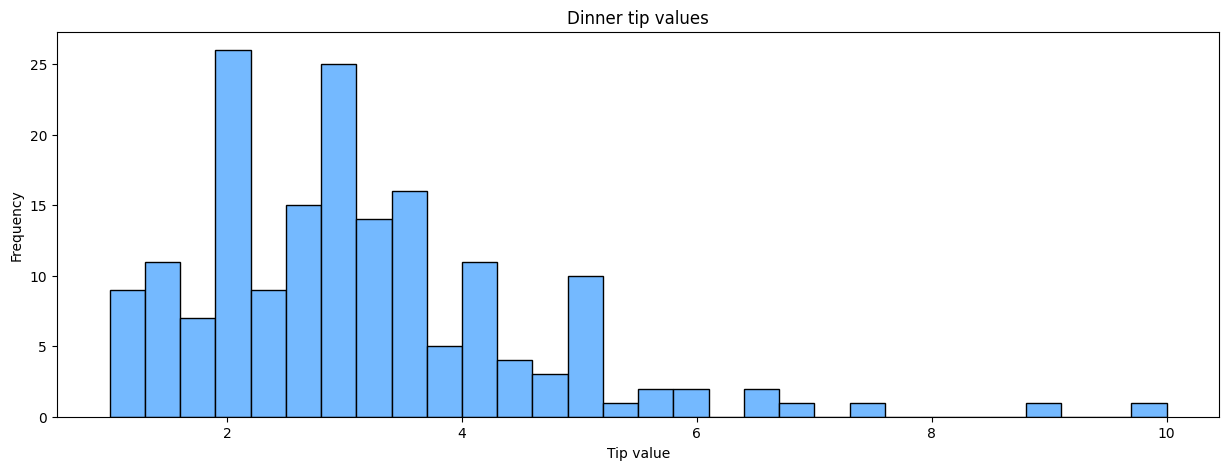

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(dinner_df['tip'], bins=30, color='#74b9ff', edgecolor='black')

# Customizing the plot
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Dinner tip values')


# Show the plot
plt.show()

#####**Lunch tips histogram**

Plot the histogram for the lunch dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Lunch tip values`
* Gridlines: `show`

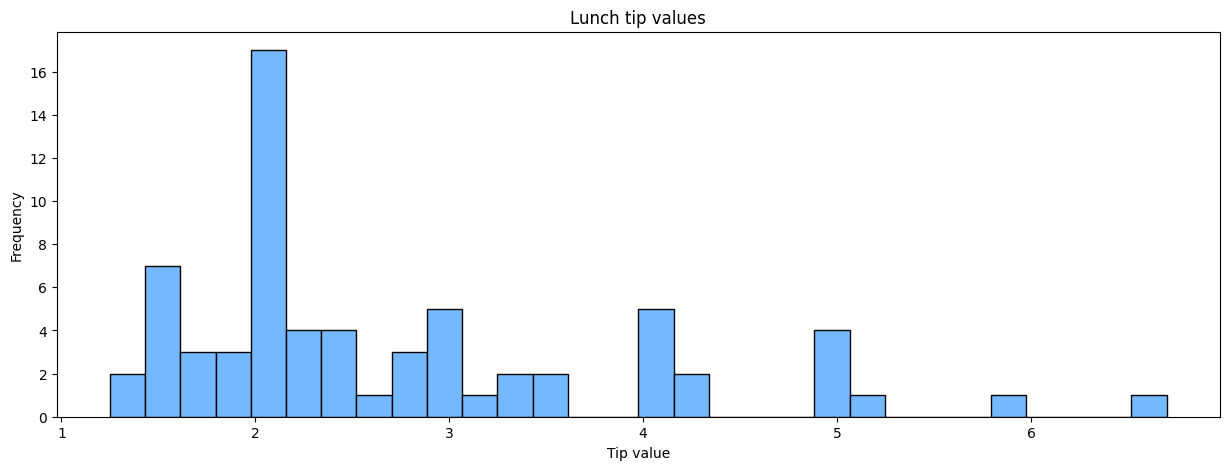

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(lunch_df['tip'], bins=30, color='#74b9ff', edgecolor='black')

# Customizing the plot
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Lunch tip values')


# Show the plot
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:





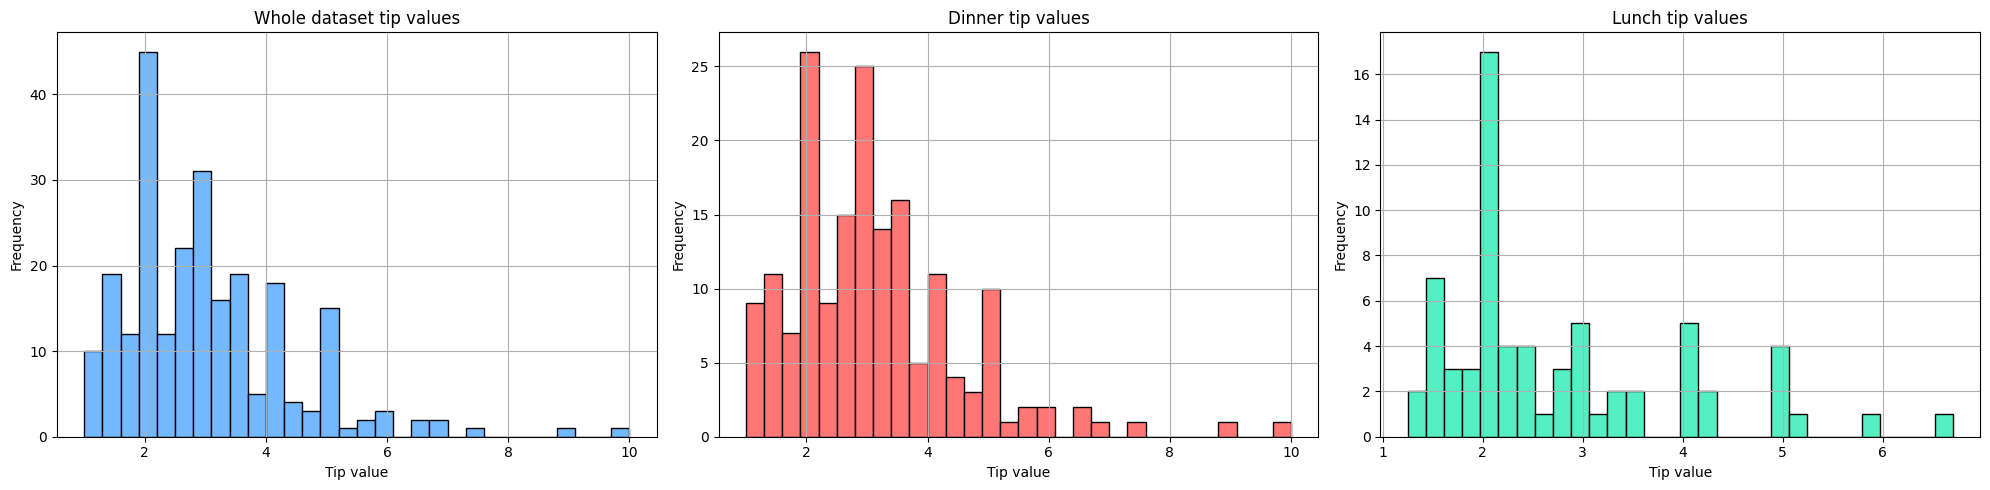

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Whole dataset
axes[0].hist(df1['tip'], bins=30, color='#74b9ff', edgecolor='black')
axes[0].set_title('Whole dataset tip values')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Thursday
axes[1].hist(dinner_df['tip'], bins=30, color='#ff7675', edgecolor='black')
axes[1].set_title('Dinner tip values')
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# Friday
axes[2].hist(lunch_df['tip'], bins=30, color='#55efc4', edgecolor='black')
axes[2].set_title('Lunch tip values')
axes[2].set_xlabel('Tip value')
axes[2].set_ylabel('Frequency')
axes[2].grid(True)


plt.tight_layout()
plt.show()


Perform the same steps based on the column **time**.